In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [5]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

In [6]:
a = np.array([1,1])
X_new = np.vstack((X, a))
Y_new = [-1] * 20 + [1] * 20 + [-1]

a = np.array([2,2])
X_new2 = np.vstack((X, a))
Y_new2 = [-1] * 20 + [1] * 20 + [-1]

Text(0.5, 1.0, 'Linear Not Separable 2')

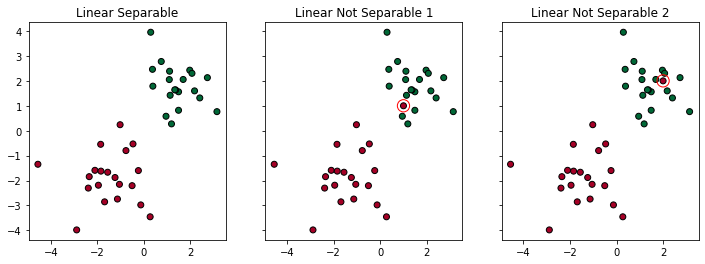

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),sharey=True)
ax1.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap='RdYlGn',edgecolors='k')
ax1.set_title('Linear Separable')

ax2.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',edgecolors='k')
ax2.scatter(1, 1, s=150, facecolors='none', zorder=10, edgecolors='r')
ax2.set_title('Linear Not Separable 1')

ax3.scatter(X_new2[:, 0], X_new2[:, 1], c=Y_new2, zorder=10, cmap='RdYlGn',edgecolors='k')
ax3.scatter(2, 2, s=150, facecolors='none', zorder=10, edgecolors='r')
ax3.set_title('Linear Not Separable 2')

In [10]:
# fit svm1
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_new, Y_new)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

In [ ]:
# fit svm2
clf2 = svm.SVC(kernel='linear', C=1)
clf2.fit(X_new2, Y_new2)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf2.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

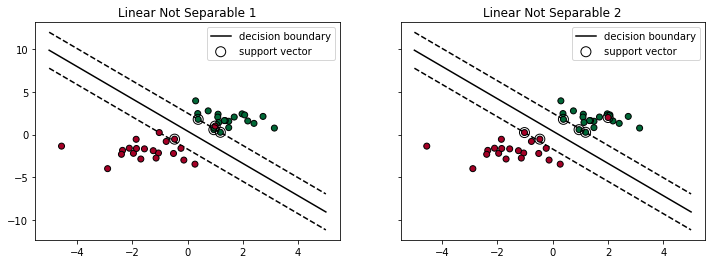

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4),sharey=True)

# plot dot
ax1.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',edgecolors='k')
# plot decision boundary
ax1.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax1.plot(xx, yy_down, 'k--')
ax1.plot(xx, yy_up, 'k--')
# plot support vector
ax1.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')
ax1.set_title('Linear Not Separable 1')

ax1.legend()

# plot dot
ax2.scatter(X_new2[:, 0], X_new2[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',edgecolors='k')
# plot decision boundary
ax2.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax2.plot(xx, yy_down, 'k--')
ax2.plot(xx, yy_up, 'k--')
# plot support vector
ax2.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')

ax2.set_title('Linear Not Separable 2')
ax2.legend()